<h1><center>APPRENTISSAGE SUPERVISE</center></h1>

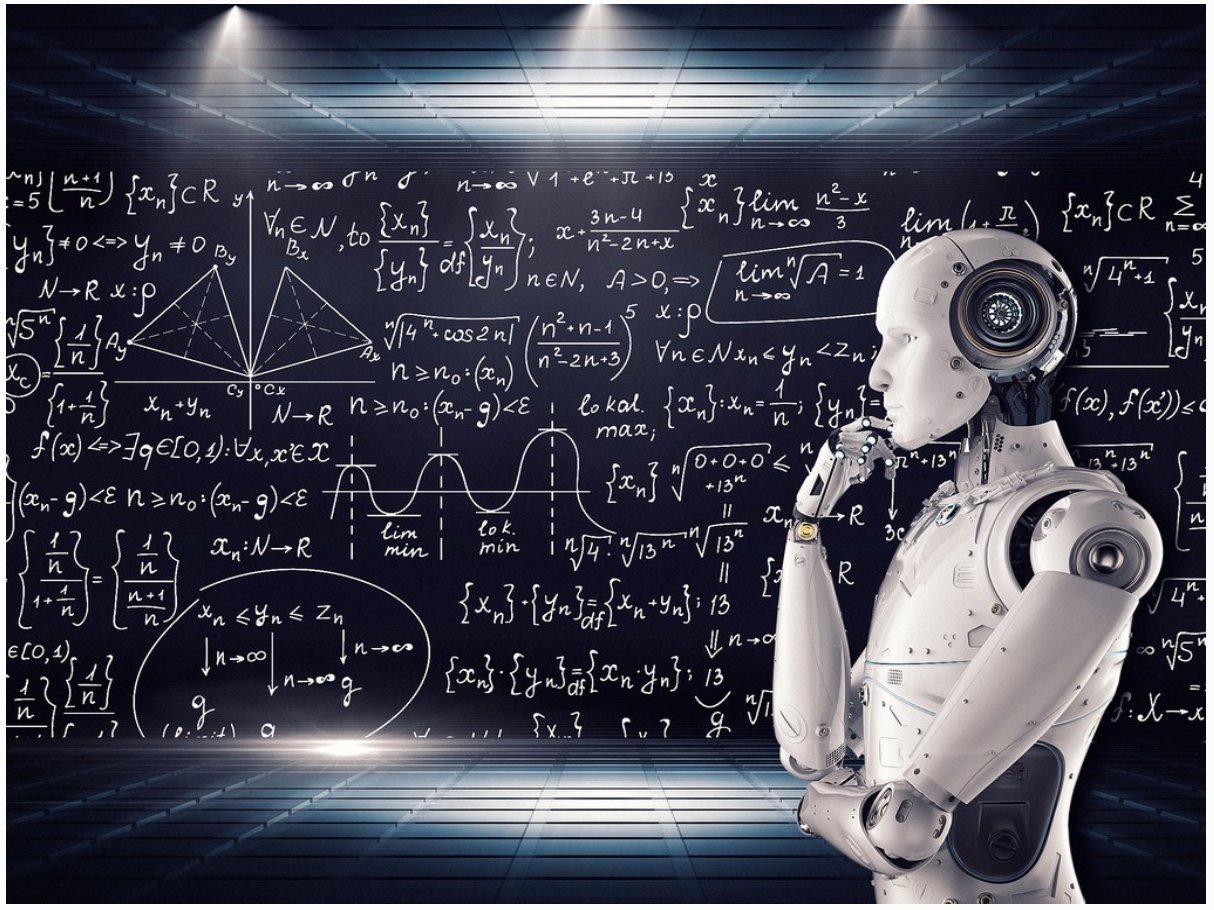

#### Requirements

   - Python 3.5
   - NumPy (pip install numpy)
   - Pandas (pip install pandas)
   - Scikit-learn (pip install scikit-learn)
   - SciPy (pip install scipy)
   - Statsmodels (pip install statsmodels)
   - MatplotLib (pip install matplotlib)
   - Seaborn (pip install seaborn)
   - Sympy (pip install sympy)

## Apprentissage : contexte et formalisation

### Apprentissage statistique 

*Plusieurs "définitions"*
  - 1. "... explores way of estimating functional dependency from a given collection of data" [Vapnik, 2000].
  - 2. "...vast set of tools for modelling and understanding complex data" [James et al., 2015]
  - 3. Comprendre et apprendre un comportement à partir d’exemples.

### Un peu d’histoire

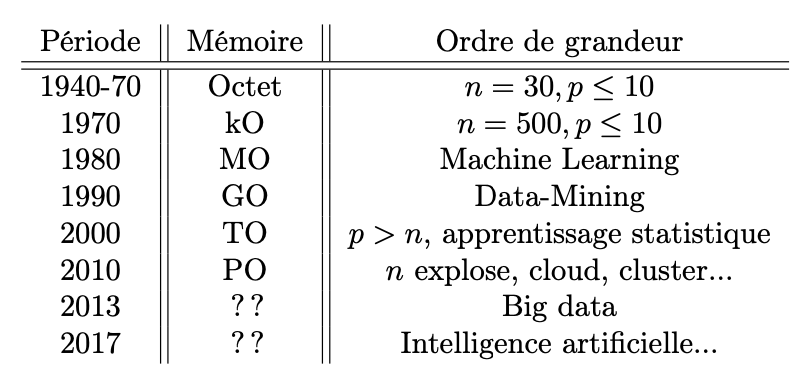

### Motivations

#### Reconnaissance de l’écriture

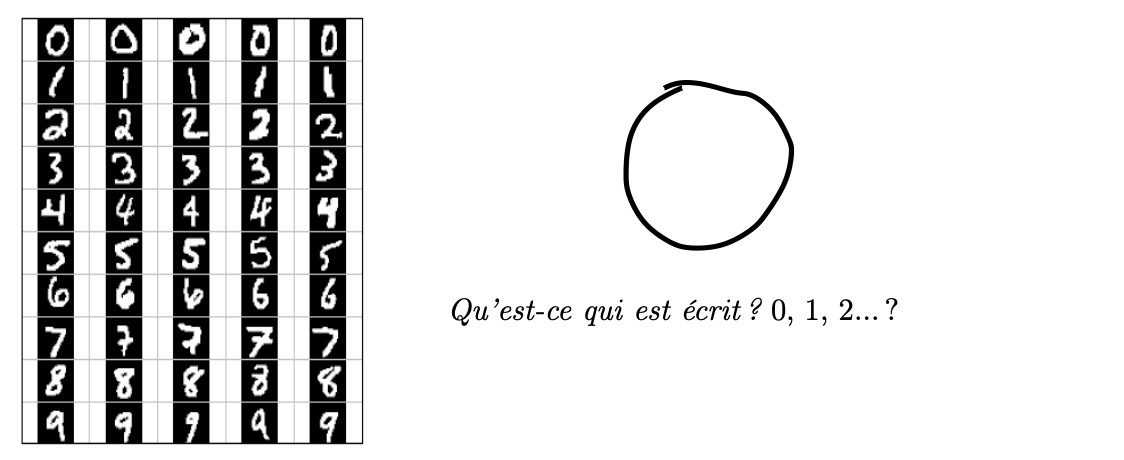

#### Reconnaissance de la parole

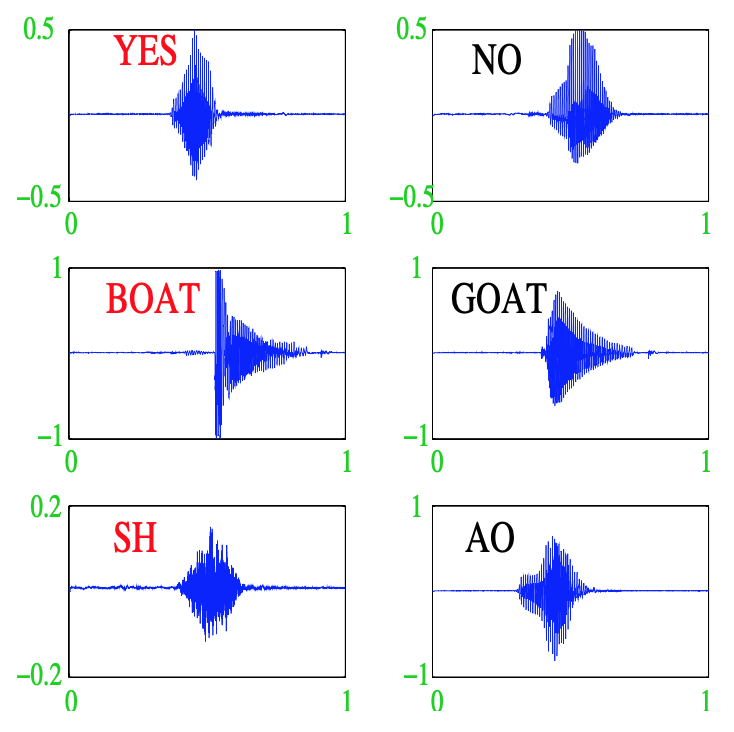

#### Prévision de pics d’ozone

  - On a mesuré pendant 366 jours la concentration maximale en ozone (V4)
  - On dispose également d’autres variables météorologiques (température, nébulosité, vent...)

*Peut-on prédire la concentration maximale en ozone du lendemain à partir des prévisions météorologiques ?*

#### Détection de spam

  - Sur 4 601 mails, on a pu identifier 1813 spams.
  - On a également mesuré sur chacun de ces mails la présence ou absence de 57 mots.

*Peut-on construire à partir de ces données une méthode de détection automatique de spam ?*

### Problématiques associées à l’apprentissage

  - *Apprentissage supervisé* : expliquer/prédire une sortie $y$ $∈$ $Y$ à partir d’entrées $x$ $∈$ $X$ ;
  - *Apprentissage non supervisé* : établir une typologie des observations ;
  - *Règles d’association* : mesurer le lien entre différents produits ;
  - *Systèmes de recommendation* : identifier les produits susceptibles d’intéresser des consommateurs. 

#### Nombreuses applications

*finance, économie, marketing, biologie, médecine...*

## Cadre mathématique pour l’apprentissage supervisé

### Régression vs Discrimination

   - Données de type entrée-sortie : $d_n$ = $(x_1, y_1)$, . . . , $(x_n, y_n)$ où $x_i$ $∈$ $X$ représente l’entrée et $y_i$ $∈$ $Y$ la sortie.

#### Objectifs

  - 1. Expliquer le(s) méchanisme(s) liant les entrée $x_i$ aux sorties $y_i$ ;
  - 2. Prédire « au mieux » la sortie $y$ associée à une nouvelle entrée $x$ $∈$ $X$ .

#### Vocabulaire

   - Lorsque la variable à expliquer est quantitative $(Y ⊆ R)$, on parle de **régression**.
   - Lorsqu’elle est qualitative ($Card(Y)$ fini), on parle de discrimination ou de **classification supervisée**.

##### Exemples

La plupart des problèmes présentés précédemment peuvent être appréhendés dans un contexte d’apprentissage supervisé : on cherche à expliquer une sortie $y$ par des entrées $x$ :

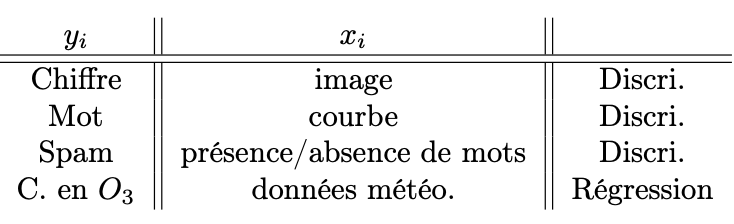


### Un début de formalisation mathématique

  - Etant données des observations $d_n$ = {$(x_1 , y_1 ), . . . , (x_n , y_n )$} on cherche à expliquer/prédire les sortie $y_i$ $∈$ $Y$ à partir des entrées $x_i$ $∈$ $X$ .

  - Il s’agit donc de trouver une fonction de prévision $f$ : $X$ → $Y$ telle que :
  $$f(x_i) ≈ y_i,i = 1,...,n.$$

   - Nécessité de se donner un critère qui permette de mesurer la qualité des fonctions de prévision $f$.

## Data Preprocessing 

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
# Chargement de la donnée et affichage des 5 premières lignes
titanic_train = pd.read_csv("./train_titanic.csv")
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


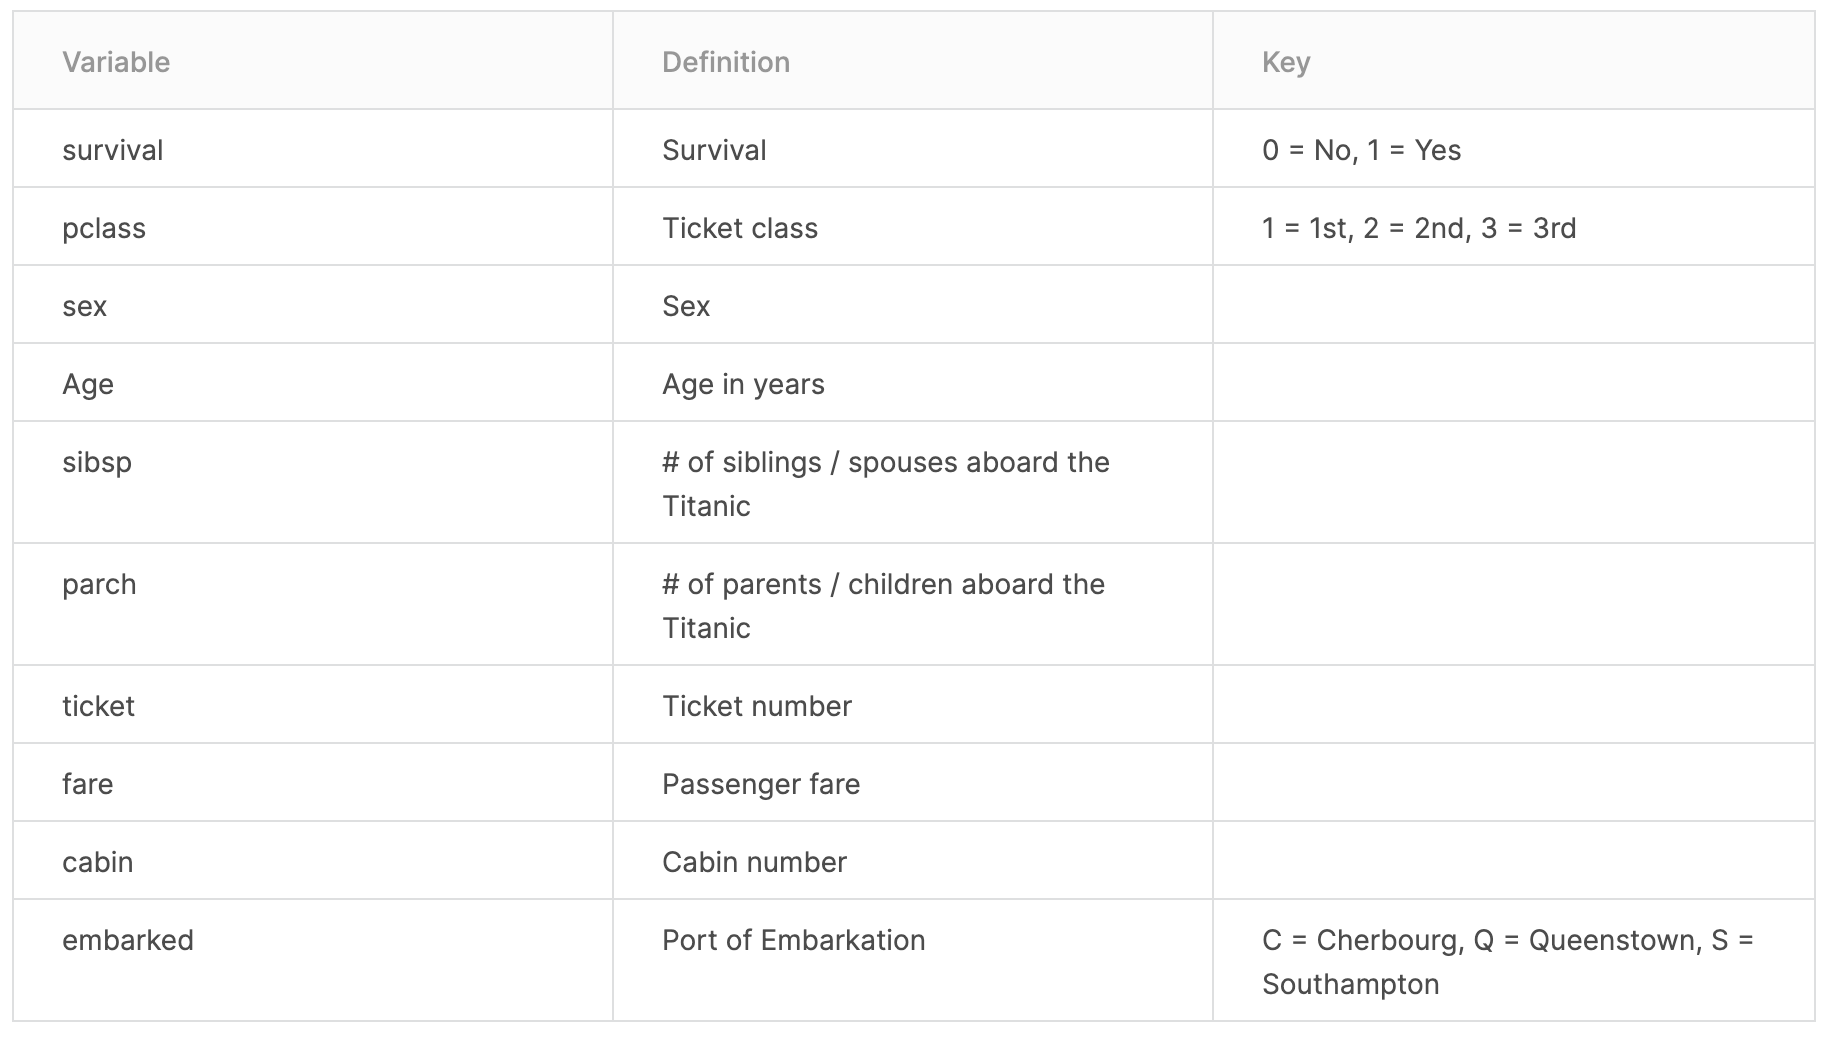

In [10]:
# Nombre de lignes et nombre de colonnes
titanic_train.shape

(891, 12)

In [11]:
# info sur la donnée
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Info sur les colonnes
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
### Descirption
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# compter le nombre de valeurs manquantes
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### PassengerId

In [18]:
# compter le nombre de id unique 
titanic_train.groupby(by = ["PassengerId"])

In [21]:
# compter le nombre de id unique 
titanic_train.groupby(by = ["PassengerId"]).count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,1,1,1,1,1,1,1,1,1,0,1
888,1,1,1,1,1,1,1,1,1,1,1
889,1,1,1,1,0,1,1,1,1,0,1


##### Survived

In [22]:
# Nombre de survivants
titanic_train.groupby(by = ["Survived"]).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [24]:
titanic_train.value_counts(subset=['Survived'])

Survived
0           549
1           342
dtype: int64

/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survived')

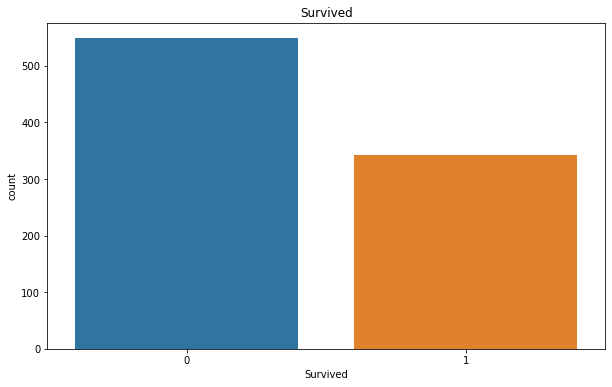

In [28]:
f, ax = plt.subplots(1,1,figsize=(10, 6))
sns.countplot(titanic_train.Survived, ax=ax)
ax.set_title('Survived')

##### Pclass

In [34]:
## Nombre de class
titanic_train.value_counts(subset=['Pclass'])

Pclass
3         491
1         216
2         184
dtype: int64

In [35]:
titanic_train.value_counts(subset=['Pclass', 'Sex'])

Pclass  Sex   
3       male      347
        female    144
1       male      122
2       male      108
1       female     94
2       female     76
dtype: int64

In [40]:
titanic_train.groupby(by = ["Pclass"]).agg(["count"])[["PassengerId"]]

,PassengerId
,count
Pclass,
1,216
2,184
3,491


In [39]:
# group by Pclass count PassengerId, mean of Age and sum of Fare
titanic_train.groupby(by = ["Pclass"]).agg({"PassengerId" : "count", "Age" : "mean", "Fare" : "sum"})

,PassengerId,Age,Fare
Pclass,,,
1,216,38.233441,18177.4125
2,184,29.877630,3801.8417
3,491,25.140620,6714.6951
